# 🧠 CELL 1 — Imports  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from pathlib import Path
import sys


# 🧠 CELL 2 — Set project root & import preprocess function

In [5]:
import sys
from pathlib import Path

# Go 2 levels up from notebook to reach project root
PROJECT_ROOT = Path().resolve().parents[1]

print("Project Root:", PROJECT_ROOT)

# Add root and scripts folder to Python path
sys.path.append(str(PROJECT_ROOT))
sys.path.append(str(PROJECT_ROOT / "scripts"))


Project Root: C:\College-Work\Projects\AEGIS-XAI-NIDS


In [6]:
from aegis.data.preprocess.preprocess import preprocess_dataframe
from scripts.run_preprocess import load_dataset


# 🧠 CELL 3 — Choose Dataset

In [7]:
DATASET = "cicids"   # "cicids" or "unsw" or "botiot"
print(f"Dataset selected: {DATASET}")


Dataset selected: cicids


# 🧠 CELL 4 — Load the dataset

In [8]:
df = load_dataset(DATASET)
print("Loaded shape:", df.shape)
df.head()


[+] Loading parquet: C:\College-Work\Projects\AEGIS-XAI-NIDS\aegis\data\processed\cicids_merged.parquet
Loaded shape: (2830743, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# 🧠 CELL 5 — Preprocess

In [9]:
X_train, X_test, y_train, y_test = preprocess_dataframe(df)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


[+] Using label column: Label

[DEBUG] Numeric columns detected: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK

C:\College-Work\Projects\AEGIS-XAI-NIDS\aegis\data\preprocess\preprocess.py:67: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(0)


X_train: (2264594, 78)
X_test: (566149, 78)
y_train: (2264594,)
y_test: (566149,)


# 🧠 CELL 6 — Train Logistic Regression

In [10]:
lr = LogisticRegression(max_iter=500, n_jobs=-1)
lr.fit(X_train, y_train)

print("Logistic Regression Training Done.")


Logistic Regression Training Done.


# 🧠 CELL 7 — LR Metrics

In [11]:
y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.9762641990006165
Precision: 0.9770895668016509
Recall: 0.9762641990006165
F1 Score: 0.9757819759511858


# 🧠 CELL 8 — Confusion Matrix Heatmap (Visual)

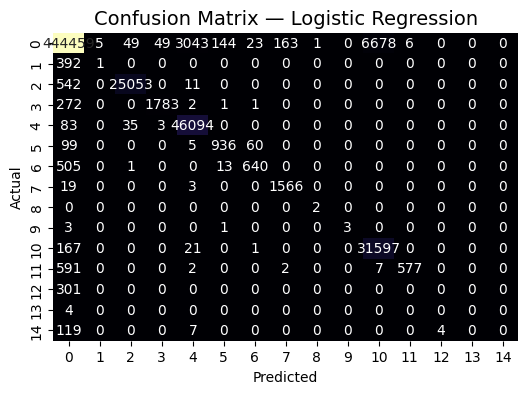

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False)
plt.title("Confusion Matrix — Logistic Regression", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🧠 CELL 9 — Train Random Forest

In [13]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("Random Forest Training Done.")


Random Forest Training Done.


# 🧠 CELL 10 — RF Metrics

In [14]:
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.998694689913786
Precision: 0.9986555051749207
Recall: 0.998694689913786
F1 Score: 0.9986640466969243


# 🧠 CELL 11 — RF Confusion Matrix Heatmap

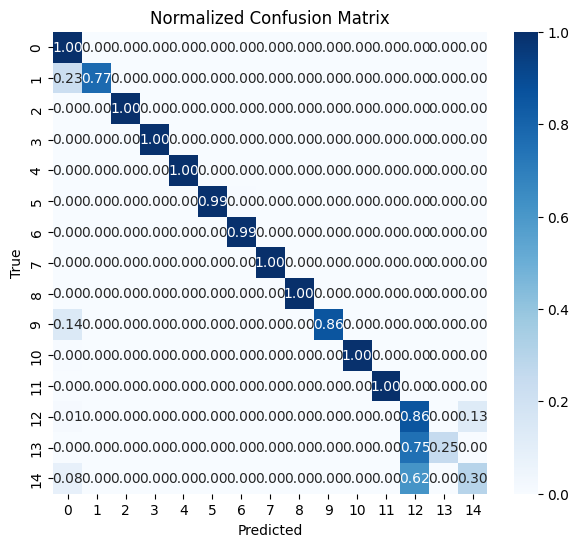

In [15]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f")
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

def cross_validate_model(model, X, y, n_splits=5):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=42
    )

    acc_scores = []
    f1_scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)

        acc_scores.append(accuracy_score(y_val, preds))
        f1_scores.append(
            f1_score(y_val, preds, average="weighted", zero_division=0)
        )

    return {
        "accuracy_mean": np.mean(acc_scores),
        "accuracy_std": np.std(acc_scores),
        "f1_mean": np.mean(f1_scores),
        "f1_std": np.std(f1_scores)
    }


In [17]:
print("Running Cross-Validation...")

lr_cv = cross_validate_model(lr, X_train, y_train)
rf_cv = cross_validate_model(rf, X_train, y_train)

print("Logistic Regression CV:", lr_cv)
print("Random Forest CV:", rf_cv)


Running Cross-Validation...
Logistic Regression CV: {'accuracy_mean': np.float64(0.9758526250182282), 'accuracy_std': np.float64(0.00028978883025783007), 'f1_mean': np.float64(0.9754025559587391), 'f1_std': np.float64(0.0002816131056069559)}
Random Forest CV: {'accuracy_mean': np.float64(0.9985379277671032), 'accuracy_std': np.float64(1.356765874351359e-05), 'f1_mean': np.float64(0.9985073788758984), 'f1_std': np.float64(1.906047752390965e-05)}


In [18]:
import joblib

joblib.dump(lr, f"{DATASET}_logistic_model.joblib")
joblib.dump(rf, f"{DATASET}_rf_model.joblib")

print("Models saved successfully.")


Models saved successfully.


In [19]:
import pandas as pd

baseline_results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, lr.predict(X_test)),
        "Precision": precision_score(y_test, lr.predict(X_test), average="weighted", zero_division=0),
        "Recall": recall_score(y_test, lr.predict(X_test), average="weighted", zero_division=0),
        "F1": f1_score(y_test, lr.predict(X_test), average="weighted", zero_division=0)
    },
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, rf.predict(X_test)),
        "Precision": precision_score(y_test, rf.predict(X_test), average="weighted", zero_division=0),
        "Recall": recall_score(y_test, rf.predict(X_test), average="weighted", zero_division=0),
        "F1": f1_score(y_test, rf.predict(X_test), average="weighted", zero_division=0)
    }
])

baseline_results


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.975544,0.976754,0.975544,0.975076
1,Random Forest,0.998613,0.998574,0.998613,0.998586


In [20]:
import json
import os

metrics_payload = {
    "dataset": DATASET,
    "logistic_regression": {
        "test_metrics": {
            "accuracy": baseline_results.iloc[0]["Accuracy"],
            "precision": baseline_results.iloc[0]["Precision"],
            "recall": baseline_results.iloc[0]["Recall"],
            "f1": baseline_results.iloc[0]["F1"]
        },
        "cv_metrics": lr_cv
    },
    "random_forest": {
        "test_metrics": {
            "accuracy": baseline_results.iloc[1]["Accuracy"],
            "precision": baseline_results.iloc[1]["Precision"],
            "recall": baseline_results.iloc[1]["Recall"],
            "f1": baseline_results.iloc[1]["F1"]
        },
        "cv_metrics": rf_cv
    }
}

os.makedirs("metrics", exist_ok=True)

with open(f"metrics/{DATASET}_task2_metrics.json", "w") as f:
    json.dump(metrics_payload, f, indent=4)

print("Task-2 metrics saved successfully.")


Task-2 metrics saved successfully.
